### Week I

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
#print(boston.DESCR)

In [6]:
X = boston.data
y = boston.target

In [7]:
df = pd.DataFrame(X, columns = boston.feature_names)

In [8]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


$$(X^TX)^{-1}X^Ty$$

In [9]:
type(X)

numpy.ndarray

In [10]:
X.T

array([[6.3200e-03, 2.7310e-02, 2.7290e-02, ..., 6.0760e-02, 1.0959e-01,
        4.7410e-02],
       [1.8000e+01, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.3100e+00, 7.0700e+00, 7.0700e+00, ..., 1.1930e+01, 1.1930e+01,
        1.1930e+01],
       ...,
       [1.5300e+01, 1.7800e+01, 1.7800e+01, ..., 2.1000e+01, 2.1000e+01,
        2.1000e+01],
       [3.9690e+02, 3.9690e+02, 3.9283e+02, ..., 3.9690e+02, 3.9345e+02,
        3.9690e+02],
       [4.9800e+00, 9.1400e+00, 4.0300e+00, ..., 5.6400e+00, 6.4800e+00,
        7.8800e+00]])

In [11]:
np.linalg.inv(np.array([[1, 2], [4, 5]]))

array([[-1.66666667,  0.66666667],
       [ 1.33333333, -0.33333333]])

In [12]:
#np.matmul(X.T, X)
prod = X.T@X

In [13]:
inv = np.linalg.inv(prod)

In [14]:
left_side = inv@X.T

In [15]:
coefs = left_side@y

In [16]:
pd.DataFrame({'coef': coefs, 'feature': boston.feature_names})

,coef,feature
0,-0.092897,CRIM
1,0.048715,ZN
2,-0.004060,INDUS
3,2.853999,CHAS
4,-2.868436,NOX
5,5.928148,RM
6,-0.007269,AGE
7,-0.968514,DIS
8,0.171151,RAD
9,-0.009396,TAX


In [17]:
X = np.linspace(0, 2, 10)
y = X**2 + np.random.random(10)

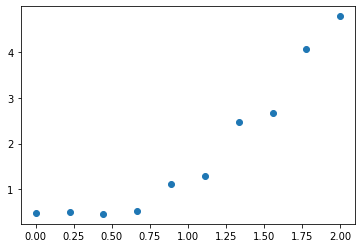

In [18]:
plt.plot(X, y, 'o')

In [19]:
X


array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [20]:
X**2

array([0.        , 0.04938272, 0.19753086, 0.44444444, 0.79012346,
       1.2345679 , 1.77777778, 2.41975309, 3.16049383, 4.        ])

In [21]:
#pd.DataFrame({'x': X, 'x2': X**2})

In [22]:
feats = np.vstack([np.ones(len(X)), X, X**2]).T

In [23]:
feats.shape

(10, 3)

In [24]:
feats

array([[1.        , 0.        , 0.        ],
       [1.        , 0.22222222, 0.04938272],
       [1.        , 0.44444444, 0.19753086],
       [1.        , 0.66666667, 0.44444444],
       [1.        , 0.88888889, 0.79012346],
       [1.        , 1.11111111, 1.2345679 ],
       [1.        , 1.33333333, 1.77777778],
       [1.        , 1.55555556, 2.41975309],
       [1.        , 1.77777778, 3.16049383],
       [1.        , 2.        , 4.        ]])

In [25]:
inv = np.linalg.inv(feats.T@feats)

In [26]:
left_mult = inv@feats.T

In [27]:
left_mult@y

array([ 0.50021641, -0.70476813,  1.4508533 ])

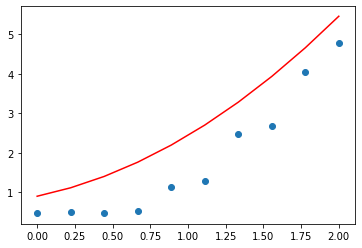

In [28]:
plt.scatter(X, y)
plt.plot(X, .9 + 0.8*X + 0.74*X**2, '-r')